In [1]:
pip install catboost

pip install miceforest

pip install kneed

SyntaxError: ignored

In [2]:
import pandas as pd
from urllib.parse import urlsplit
from urllib.parse import urlparse
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statistics import mean
import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

from imblearn.combine import SMOTETomek
from kneed import KneeLocator

from prettytable import PrettyTable


warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Reading Data

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/phishing_site_urls.csv")

In [5]:
# Checking first 5 rows

df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [6]:
# Number of rows and columns

df.shape

(549346, 2)

In [7]:
# Describe the dataset

df.describe()

,URL,Label
count,549346,549346
unique,507195,2
top,jhomitevd2abj3fk.tor2web.org/,good
freq,52,392924


In [8]:
# Checking datatypes of the columns

df.dtypes

URL      object
Label    object
dtype: object

In [9]:
# Columns in the dataset

df.columns

Index(['URL', 'Label'], dtype='object')

# Extracting data from the URL

In [10]:
df.columns

Index(['URL', 'Label'], dtype='object')

In [11]:
# Extracting domain name from the URL
def extract_domain(url):
    match = re.search("^[^/]+", url)
    return match.group() if match else None

In [12]:
# Extracting path from the URL

def extract_path(url):
    match = re.search("/[^?]+", url)
    return match.group() if match else None

In [13]:
# Extracting query string from the URL

def extract_query_string(url):
    match = re.search("\?[^#]+", url)
    return match.group() if match else None

In [14]:
# Extracting fragment from the URL

def extract_fragment(url):
    match = re.search("#[^/]+", url)
    return match.group()[1:] if match else None

In [15]:
# Creating domain name column

df["domain_name"] = df["URL"].apply(lambda x: extract_domain(x))

In [16]:
# Creating path column

df["path"] = df["URL"].apply(lambda x: extract_path(x))

In [17]:
# Creating query string column

df["query_string"] = df["URL"].apply(lambda x: extract_query_string(x))

In [18]:
# Creating fragment column

df["fragment"] = df["URL"].apply(lambda x: extract_fragment(x))

In [19]:
df.isnull().sum()

URL                  0
Label                0
domain_name          1
path             62960
query_string    467489
fragment        548838
dtype: int64

In [20]:
# percentage of null values in each column

frag_null = (df["fragment"].isnull().sum()/df.shape[0])*100
domain_null = (df["domain_name"].isnull().sum()/df.shape[0])*100
path_null = (df["path"].isnull().sum()/df.shape[0])*100
query_string_null = (df["query_string"].isnull().sum()/df.shape[0])*100

print(f"Percentage of null values in each column")
print("------------------------------------------")
print(f"domain: {domain_null}%")
print(f"path: {path_null}%")
print(f"query string: {query_string_null}%")
print(f"fragment: {frag_null}%")

Percentage of null values in each column
------------------------------------------
domain: 0.00018203463755083317%
path: 11.460900780200456%
query string: 85.09919067400145%
fragment: 99.90752640412418%


In [21]:
df.shape

(549346, 6)

# Extracting other features from the URL and creating columns

In [22]:
def count_dots(url):
    return url.count(".")

url = "https://plu.mx/plum/a?mendeley_data_id=72ptz43s9v&theme=plum-bigben-theme"
dot_count = count_dots(url)
print("Number of dots in the URL:", dot_count)

Number of dots in the URL: 1


In [23]:
df["qty_dot_url"] = df["URL"].apply(lambda x: count_dots(x))

In [24]:
def count_hyphen(url):
    return url.count("-")

hyphen_count = count_hyphen(url)
print("Number of hyphen in the URL:", hyphen_count)

Number of hyphen in the URL: 2


In [25]:
df["qty_hyphen_url"] = df["URL"].apply(lambda x: count_hyphen(x))

In [26]:
def count_underline(url):
    return url.count("_")

underline_count = count_underline(url)
print("Number of underline in the URL:", underline_count)

Number of underline in the URL: 2


In [27]:
df["qty_underline_url"] = df["URL"].apply(lambda x: count_underline(x))

In [28]:
def count_slash(url):
    return url.count("/")

slash_count = count_slash(url)
print("Number of slash in the URL:", slash_count)

Number of slash in the URL: 4


In [29]:
df["qty_slash_url"] = df["URL"].apply(lambda x: count_slash(x))

In [30]:
 def count_question_mark(url):
        return url.count("?")
    
question_mark_count = count_question_mark(url)
print("Number of question marks in the URL:", question_mark_count)

Number of question marks in the URL: 1


In [31]:
df["qty_question_mark_url"] = df["URL"].apply(lambda x: count_question_mark(x))

In [32]:
def count_equal_sign(url):
    return url.count("=")

equal_sign_count = count_equal_sign(url)
print("Number of equal signs in the URL:", equal_sign_count)

Number of equal signs in the URL: 2


In [33]:
df["qty_equal_sign_url"] = df["URL"].apply(lambda x: count_equal_sign(x))

In [34]:
def count_at_sign(url):
    return url.count("@")

at_sign_count = count_at_sign(url)
print("Number of at_sign in the URL:", at_sign_count)

Number of at_sign in the URL: 0


In [35]:
df["qty_at_sign_url"] = df["URL"].apply(lambda x: count_at_sign(x))

In [36]:
def count_and_sign(url):
    return url.count("&")

and_sign_count = count_and_sign(url)
print("Number of and_sign in the URL:", and_sign_count)

Number of and_sign in the URL: 1


In [37]:
df["qty_and_sign_url"] = df["URL"].apply(lambda x: count_and_sign(x))

In [38]:
def count_exclaimation(url):
    return url.count("!")

exclaimation_count = count_exclaimation(url)
print("Number of exclaimation in the URL:", exclaimation_count)

Number of exclaimation in the URL: 0


In [39]:
df["qty_exclaimation_url"] = df["URL"].apply(lambda x: count_exclaimation(x))

In [40]:
def count_spaces(url):
    return url.count(" ")

spaces_count = count_spaces(url)
print("Number of spaces in the URL:", spaces_count)

Number of spaces in the URL: 0


In [41]:
df["qty_spaces_url"] = df["URL"].apply(lambda x: count_spaces(x))

In [42]:
def count_commas(url):
    return url.count(",")

commas_count = count_commas(url)
print("Number of commas in the URL:", commas_count)

Number of commas in the URL: 0


In [43]:
df["qty_commas_url"] = df["URL"].apply(lambda x: count_commas(x))

In [44]:
def count_plus_sign(url):
    return url.count(",")

plus_sign_count = count_plus_sign(url)
print("Number of plus signs in the URL:", plus_sign_count)

Number of plus signs in the URL: 0


In [45]:
df["qty_plus_sign_url"] = df["URL"].apply(lambda x: count_plus_sign(x))

In [46]:
def count_asterisk(url):
    return url.count("*")

asterisk_count = count_asterisk(url)
print("Number of asterisk in the URL:", asterisk_count)

Number of asterisk in the URL: 0


In [47]:
df["qty_asterisk_url"] = df["URL"].apply(lambda x: count_asterisk(x))

In [48]:
def count_hashtags(url):
    return url.count("#")

hashtag_count = count_hashtags(url)
print("Number of hashtag in the URL:", hashtag_count)

Number of hashtag in the URL: 0


In [49]:
df["qty_hashtags_url"] = df["URL"].apply(lambda x: count_hashtags(x))

In [50]:
def count_dollar_sign(url):
    return url.count("$")

dollar_sign_count = count_dollar_sign(url)
print("Number of dollar signs in the URL:", dollar_sign_count)

Number of dollar signs in the URL: 0


In [51]:
df["qty_dollar_sign_url"] = df["URL"].apply(lambda x: count_dollar_sign(x))

In [52]:
def count_percentile_sign(url):
    return url.count("%")

percentile_sign_count = count_percentile_sign(url)
print("Number of percentile signs in the URL:", percentile_sign_count)

Number of percentile signs in the URL: 0


In [53]:
df["qty_percentile_sign_url"] = df["URL"].apply(lambda x: count_percentile_sign(x))

In [54]:
def url_len(url):
    return len(url)

length_url = url_len(url)
print("Lenght of the URL:", length_url)

Lenght of the URL: 73


In [55]:
df["url_length"] = df["URL"].apply(lambda x: url_len(x))

# Exploratory Data Analysis

In [56]:
# number of rows and columns
df.shape

(549346, 23)

In [57]:
# column names

df.columns

Index(['URL', 'Label', 'domain_name', 'path', 'query_string', 'fragment',
       'qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_question_mark_url', 'qty_equal_sign_url', 'qty_at_sign_url',
       'qty_and_sign_url', 'qty_exclaimation_url', 'qty_spaces_url',
       'qty_commas_url', 'qty_plus_sign_url', 'qty_asterisk_url',
       'qty_hashtags_url', 'qty_dollar_sign_url', 'qty_percentile_sign_url',
       'url_length'],
      dtype='object')

In [58]:
# Basic info of all the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   URL                      549346 non-null  object
 1   Label                    549346 non-null  object
 2   domain_name              549345 non-null  object
 3   path                     486386 non-null  object
 4   query_string             81857 non-null   object
 5   fragment                 508 non-null     object
 6   qty_dot_url              549346 non-null  int64 
 7   qty_hyphen_url           549346 non-null  int64 
 8   qty_underline_url        549346 non-null  int64 
 9   qty_slash_url            549346 non-null  int64 
 10  qty_question_mark_url    549346 non-null  int64 
 11  qty_equal_sign_url       549346 non-null  int64 
 12  qty_at_sign_url          549346 non-null  int64 
 13  qty_and_sign_url         549346 non-null  int64 
 14  qty_exclaimation_url

In [59]:
#general statistics of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty_dot_url,549346.0,2.062316,1.514629,0.0,1.0,2.0,2.0,37.0
qty_hyphen_url,549346.0,1.126461,2.424343,0.0,0.0,0.0,1.0,42.0
qty_underline_url,549346.0,0.390845,1.317131,0.0,0.0,0.0,0.0,200.0
qty_slash_url,549346.0,2.445168,1.595707,0.0,1.0,2.0,3.0,35.0
qty_question_mark_url,549346.0,0.161390,0.512545,0.0,0.0,0.0,0.0,166.0
qty_equal_sign_url,549346.0,0.278629,0.956683,0.0,0.0,0.0,0.0,34.0
qty_at_sign_url,549346.0,0.003877,0.068101,0.0,0.0,0.0,0.0,10.0
qty_and_sign_url,549346.0,0.133437,0.808088,0.0,0.0,0.0,0.0,37.0
qty_exclaimation_url,549346.0,0.000907,0.043793,0.0,0.0,0.0,0.0,10.0
qty_spaces_url,549346.0,0.002397,0.062935,0.0,0.0,0.0,0.0,15.0


In [60]:
# unique values and their count in the target variable

df["Label"].value_counts()

good    392924
bad     156422
Name: Label, dtype: int64

In [61]:
# checking null values

df.isnull().sum()

URL                             0
Label                           0
domain_name                     1
path                        62960
query_string               467489
fragment                   548838
qty_dot_url                     0
qty_hyphen_url                  0
qty_underline_url               0
qty_slash_url                   0
qty_question_mark_url           0
qty_equal_sign_url              0
qty_at_sign_url                 0
qty_and_sign_url                0
qty_exclaimation_url            0
qty_spaces_url                  0
qty_commas_url                  0
qty_plus_sign_url               0
qty_asterisk_url                0
qty_hashtags_url                0
qty_dollar_sign_url             0
qty_percentile_sign_url         0
url_length                      0
dtype: int64

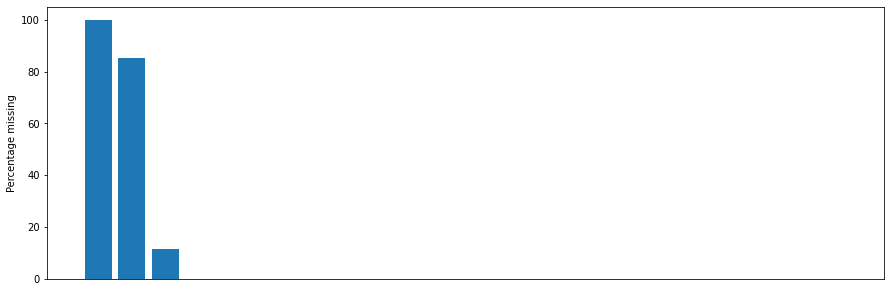

In [62]:
# Plotting null values in a graph

fig, ax = plt.subplots(figsize = (15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [63]:
# columns with more than 75% null values

dropcols = missing[missing[0]>75]
dropcols


,0
fragment,99.907526
query_string,85.099191


In [64]:
# dropping columns with more than 75% null values

df.drop(list(dropcols.index), axis = 1, inplace = True)

In [65]:
# checking null values after dropping the columns

df.isnull().sum()

URL                            0
Label                          0
domain_name                    1
path                       62960
qty_dot_url                    0
qty_hyphen_url                 0
qty_underline_url              0
qty_slash_url                  0
qty_question_mark_url          0
qty_equal_sign_url             0
qty_at_sign_url                0
qty_and_sign_url               0
qty_exclaimation_url           0
qty_spaces_url                 0
qty_commas_url                 0
qty_plus_sign_url              0
qty_asterisk_url               0
qty_hashtags_url               0
qty_dollar_sign_url            0
qty_percentile_sign_url        0
url_length                     0
dtype: int64

In [66]:
# number of rows and columns after dropping the columns with high null percentage
df.shape

(549346, 21)

In [67]:
#calculating the percentage of data that is missing in the dataset

missing_value_counts = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_value_counts.sum()


print(f"percentage of data missing from the dataset:{(total_missing/total_cells)* 100}%")

percentage of data missing from the dataset:0.5457658483256195%


Positive: 392924, Negative: 156422


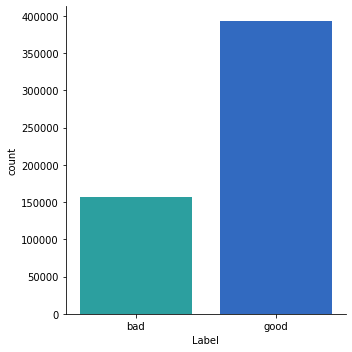

In [68]:
# Visualizing unique values in the target variable

bad = df[df['Label']=='bad'].shape[0]
good = df[df['Label']=='good'].shape[0]
print("Positive: " + str(good) + ", Negative: " + str(bad))
sns.catplot(data=df, x="Label", kind="count", palette="winter_r", alpha=.9)
plt.show()

**Report**

* The target class is very imbalanced
* Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the positive class (majority class) is very large compared to that of the negetive class (minority class)
* If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.
* Hence we should handle imbalanced data with certain methods.

**How to handle Imbalance Data ?**

* Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
* **SMOTE**: Synthetic Minority Oversampling Technique
* SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
* Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
* It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

In [69]:
#Checking co-realtion in the dataset

df.corr()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_question_mark_url,qty_equal_sign_url,qty_at_sign_url,qty_and_sign_url,qty_exclaimation_url,qty_spaces_url,qty_commas_url,qty_plus_sign_url,qty_asterisk_url,qty_hashtags_url,qty_dollar_sign_url,qty_percentile_sign_url,url_length
qty_dot_url,1.000000,-0.024473,0.060358,0.194320,0.227993,0.323723,0.096345,0.341085,0.000658,0.001183,0.031295,0.031295,0.002832,0.102432,0.003959,0.163175,0.491315
qty_hyphen_url,-0.024473,1.000000,-0.017964,0.215482,-0.034459,0.005052,-0.010225,0.024501,0.005436,-0.012307,0.000811,0.000811,0.010993,-0.006949,-0.000743,0.060699,0.419844
qty_underline_url,0.060358,-0.017964,1.000000,0.068651,0.038028,0.126237,0.003237,0.117777,0.012035,-0.004672,0.006071,0.006071,0.031282,0.002434,0.002833,0.155773,0.297745
qty_slash_url,0.194320,0.215482,0.068651,1.000000,0.061881,0.056498,0.045242,0.057487,0.013293,-0.010627,0.019187,0.019187,0.000390,0.016828,0.011661,0.015067,0.384739
qty_question_mark_url,0.227993,-0.034459,0.038028,0.061881,1.000000,0.531775,0.083924,0.332128,0.009134,0.003186,0.013421,0.013421,0.010743,0.045221,0.013079,0.097671,0.285803
qty_equal_sign_url,0.323723,0.005052,0.126237,0.056498,0.531775,1.000000,0.098337,0.886667,0.009005,0.004778,0.012788,0.012788,0.021138,0.113036,0.017378,0.277156,0.541395
qty_at_sign_url,0.096345,-0.010225,0.003237,0.045242,0.083924,0.098337,1.000000,0.112128,0.038496,0.013121,0.001186,0.001186,0.028865,0.023237,0.057072,0.006168,0.078875
qty_and_sign_url,0.341085,0.024501,0.117777,0.057487,0.332128,0.886667,0.112128,1.000000,0.014791,0.008850,0.006945,0.006945,0.022228,0.169624,0.015195,0.277501,0.512340
qty_exclaimation_url,0.000658,0.005436,0.012035,0.013293,0.009134,0.009005,0.038496,0.014791,1.000000,0.042143,0.004231,0.004231,0.101633,0.078113,0.111212,0.018505,0.025169
qty_spaces_url,0.001183,-0.012307,-0.004672,-0.010627,0.003186,0.004778,0.013121,0.008850,0.042143,1.000000,0.003642,0.003642,0.017137,0.145228,0.031242,0.001739,0.001470


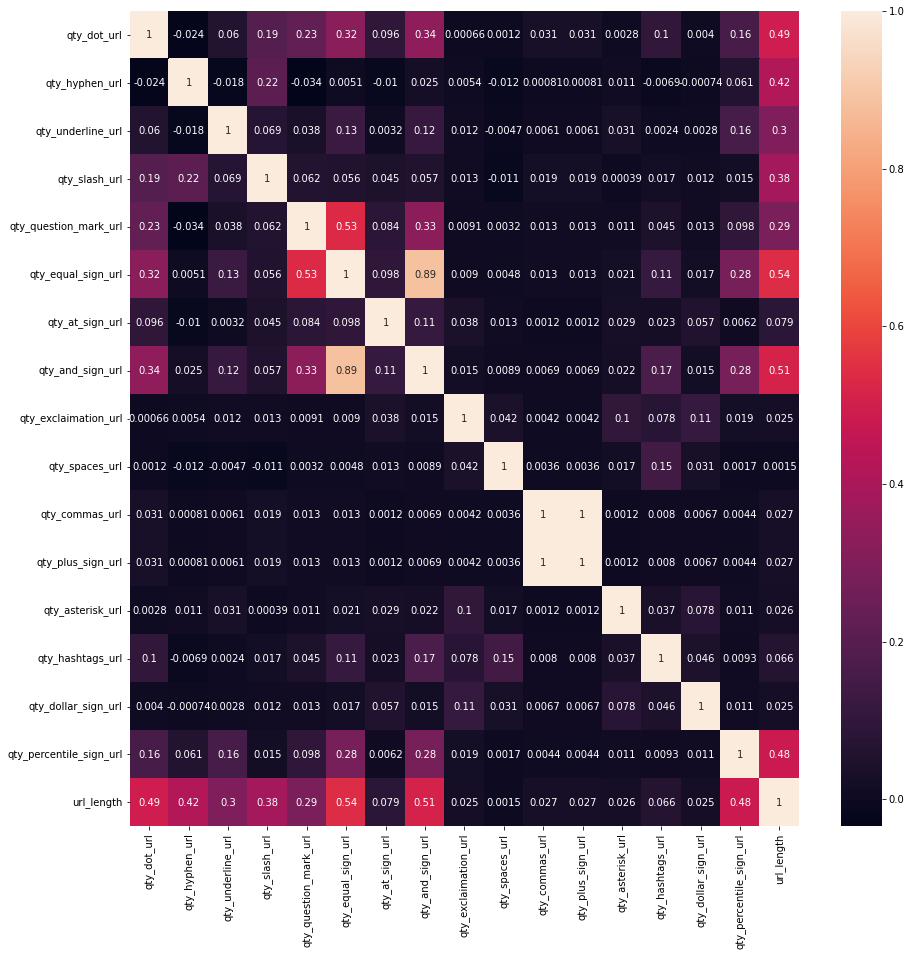

In [70]:
# plotting the co-relation
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot = True, cmap = 'rocket')
plt.show()

**Report**
* Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect
* A positive correlation exists when two variables operate in unison so that when one variable rises or falls, the other does the same. A negative correlation is when two variables move opposite one another so that when one variable rises, the other falls.
* The dataset seem to be positively correlated except for the first 3 columns

In [71]:
# checking co-variance in the dataset
df.cov()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_question_mark_url,qty_equal_sign_url,qty_at_sign_url,qty_and_sign_url,qty_exclaimation_url,qty_spaces_url,qty_commas_url,qty_plus_sign_url,qty_asterisk_url,qty_hashtags_url,qty_dollar_sign_url,qty_percentile_sign_url,url_length
qty_dot_url,2.294103,-0.089865,0.120413,0.469653,0.176995,0.469082,0.009938,0.417472,0.000044,0.000113,0.006721,0.006721,0.000156,0.005488,0.000186,0.334758,33.054173
qty_hyphen_url,-0.089865,5.877439,-0.057362,0.833600,-0.042818,0.011718,-0.001688,0.047999,0.000577,-0.001878,0.000279,0.000279,0.000968,-0.000596,-0.000056,0.199317,45.210741
qty_underline_url,0.120413,-0.057362,1.734835,0.144287,0.025673,0.159069,0.000290,0.125356,0.000694,-0.000387,0.001134,0.001134,0.001497,0.000113,0.000115,0.277903,17.419395
qty_slash_url,0.469653,0.833600,0.144287,2.546281,0.050611,0.086250,0.004916,0.074128,0.000929,-0.001067,0.004341,0.004341,0.000023,0.000950,0.000576,0.032565,27.269654
qty_question_mark_url,0.176995,-0.042818,0.025673,0.050611,0.262703,0.260752,0.002929,0.137561,0.000205,0.000103,0.000975,0.000975,0.000200,0.000820,0.000207,0.067806,6.506661
qty_equal_sign_url,0.469082,0.011718,0.159069,0.086250,0.260752,0.915242,0.006407,0.685468,0.000377,0.000288,0.001735,0.001735,0.000735,0.003825,0.000514,0.359139,23.006050
qty_at_sign_url,0.009938,-0.001688,0.000290,0.004916,0.002929,0.006407,0.004638,0.006171,0.000115,0.000056,0.000011,0.000011,0.000071,0.000056,0.000120,0.000569,0.238591
qty_and_sign_url,0.417472,0.047999,0.125356,0.074128,0.137561,0.685468,0.006171,0.653006,0.000523,0.000450,0.000796,0.000796,0.000652,0.004849,0.000380,0.303734,18.389780
qty_exclaimation_url,0.000044,0.000577,0.000694,0.000929,0.000205,0.000377,0.000115,0.000523,0.001918,0.000116,0.000026,0.000026,0.000162,0.000121,0.000151,0.001098,0.048959
qty_spaces_url,0.000113,-0.001878,-0.000387,-0.001067,0.000103,0.000288,0.000056,0.000450,0.000116,0.003961,0.000032,0.000032,0.000039,0.000323,0.000061,0.000148,0.004109


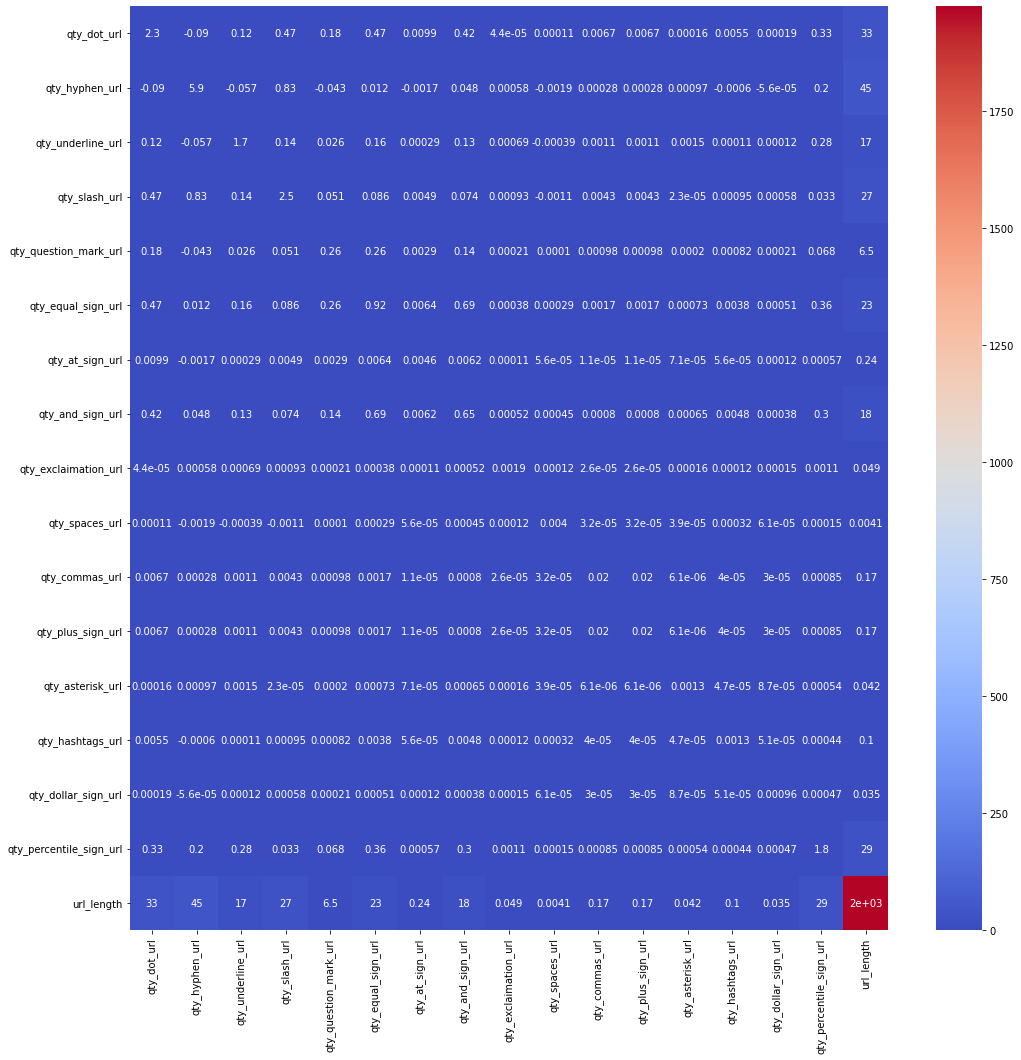

In [72]:
# plotting co-variance

cov = df.cov()
fig, ax = plt.subplots(figsize=(17,17))
sns.heatmap(cov, annot = True, cmap = 'coolwarm')
plt.show()

**Report**

* Covariance is a measure of the relationship between two random variables and to what extent, they change together. Or we can say, in other words, it defines the changes between the two variables, such that change in one variable is equal to change in another variable.
* The covariance ranges from negative values to positive values. A positive covariance indicates that the two variables tend to move together and with the same sign, a negative covariance indicates that the two variables tend to move in the opposite direction.

**Report**

* As per the above plot most of the features are not normally distributed.
* Transformation of data is not of prime importance since it is a classification problem.
* Interpreting each and every column is not necessary as this is URL data.

In [73]:
df.columns

Index(['URL', 'Label', 'domain_name', 'path', 'qty_dot_url', 'qty_hyphen_url',
       'qty_underline_url', 'qty_slash_url', 'qty_question_mark_url',
       'qty_equal_sign_url', 'qty_at_sign_url', 'qty_and_sign_url',
       'qty_exclaimation_url', 'qty_spaces_url', 'qty_commas_url',
       'qty_plus_sign_url', 'qty_asterisk_url', 'qty_hashtags_url',
       'qty_dollar_sign_url', 'qty_percentile_sign_url', 'url_length'],
      dtype='object')

In [74]:
# Separating numerical and categorical columns

num_cols = [feature for feature in df.columns if (df[feature].dtype == 'float' or df[feature].dtype == 'int')]
cat_cols = [feature for feature in df.columns if (df[feature].dtype == 'O')]

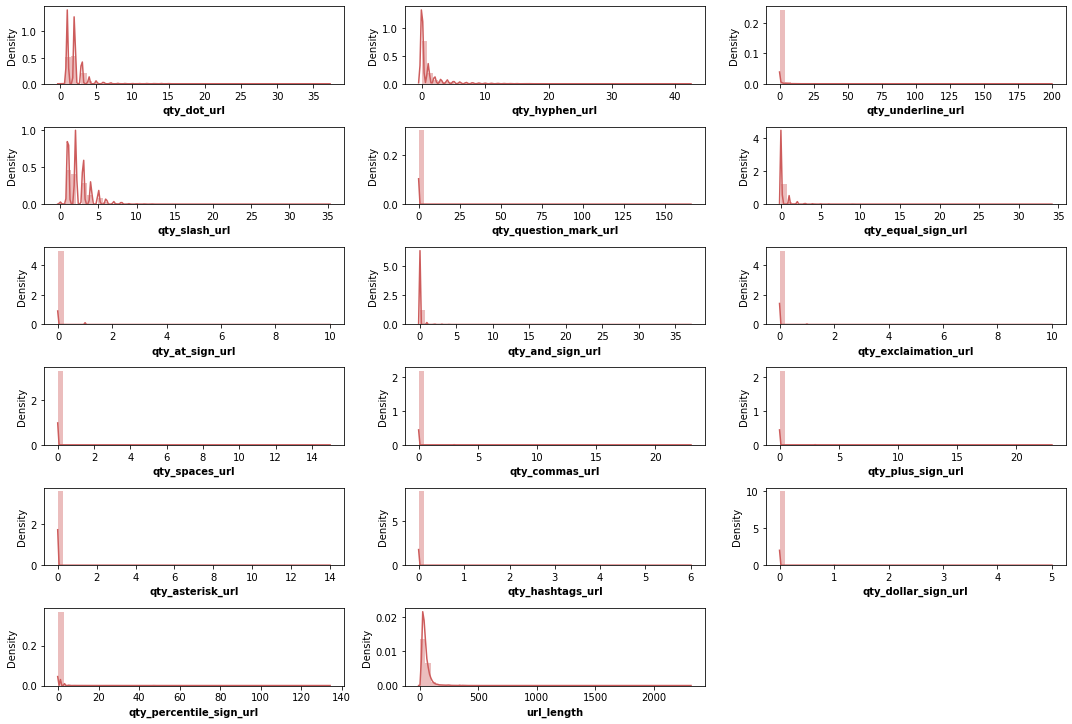

In [75]:
# Plotting the distribution of the numerical data

plt.figure(figsize=(15, 100))
for i, col in enumerate(num_cols):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

**Report**

* As per the above plot most of the features are not normally distributed.
* Transformation of data is not of prime importance since it is a classification problem.
* Interpreting each and every column is not necessary as this is sensor data.

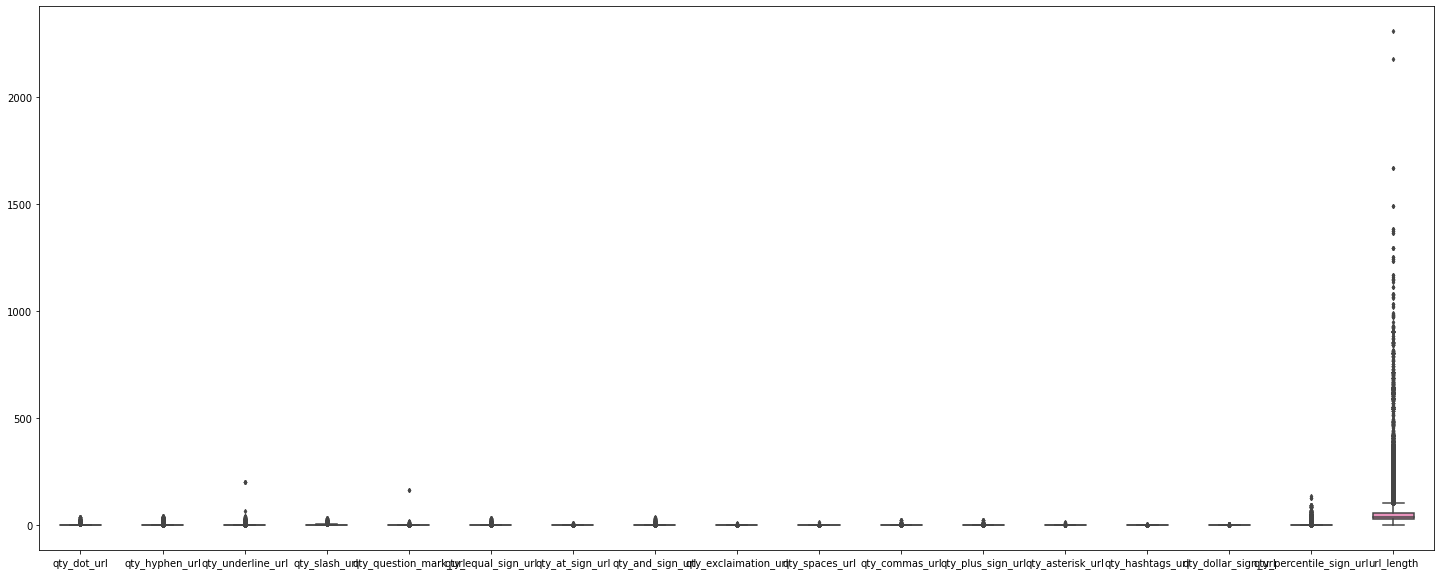

In [76]:
# Checking for outliers in the numerical data

fig, ax = plt.subplots(figsize=(25,10))
sns.boxplot(data=df[num_cols], width= 0.5,ax=ax,  fliersize=3)


**Report**

* There seems to be outliers in all the columns, espcially in the url_length column
* Handling the outliers is important since it would impact the execution and performance of the model

# Outlier Handling

* Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution
* In broad strokes, there are three causes for outliers—data entry or measurement errors, sampling problems and unusual conditions, and natural variation.
* There are multiple methods to deal with the outliers. 
* One such technique is handling the outliers using IQR
* IQR (Interquartile Range) is a statistical measure that is used to identify outliers in a dataset. It is defined as the difference between the 75th percentile (upper quartile) and the 25th percentile (lower quartile) of the data. Outliers in a dataset can be identified by computing the IQR and using it to calculate the lower and upper bounds for the data. Any data point that falls outside of these bounds is considered an outlier. The IQR approach is particularly useful for datasets that are not normally distributed, as it is based on the distribution of the data rather than assuming a normal distribution. The IQR is a robust measure of dispersion and is less sensitive to outliers than other measures, such as the standard deviation.

In [77]:
# Shape of the data before handling outliers

df.shape

(549346, 21)

In [78]:
# Get the numeric columns in the data using numpy
numeric_columns = df._get_numeric_data().columns
df_numeric = df[numeric_columns]

# Get the non-numeric columns in the data using numpy
non_numeric_columns = df.columns.difference(numeric_columns)
df_non_numeric = df[non_numeric_columns]

# Get the number of rows and columns in the numeric data
rows, cols = df_numeric.shape

# Create an empty list to store the cleaned data
cleaned_data = []

# Loop through each column in the numeric data
for col in range(cols):
    # Get the data for the current column
    column = df_numeric.iloc[:, col]
    
    # Calculate the median, first quartile (Q1), and third quartile (Q3) of the data
    median = np.median(column)
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Identify outliers based on the lower and upper bounds
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    # Remove outliers from the data
    cleaned_column = column[(column >= lower_bound) & (column <= upper_bound)]
    
    # Add the cleaned data for the current column to the list of cleaned data
    cleaned_data.append(cleaned_column)

# Convert the list of cleaned data into a dataframe
cleaned_data = pd.DataFrame(cleaned_data).T

# Combine the cleaned numeric data with the non-numeric data
cleaned_df = pd.concat([df_non_numeric, cleaned_data], axis=1)

# Drop the rows containing outliers from the original dataframe
df = df.drop(outliers.index, axis=0)


In [79]:
# shape of the cleaned data and cleaned data after dropping outliers

print(cleaned_df.shape)
print(df.shape)

(549346, 21)
(517468, 21)


In [80]:
# number of rows with outliers that are deleted from the dataset

print(f"Total number of rows removed: {cleaned_df.shape[0]- df.shape[0]}")

Total number of rows removed: 31878


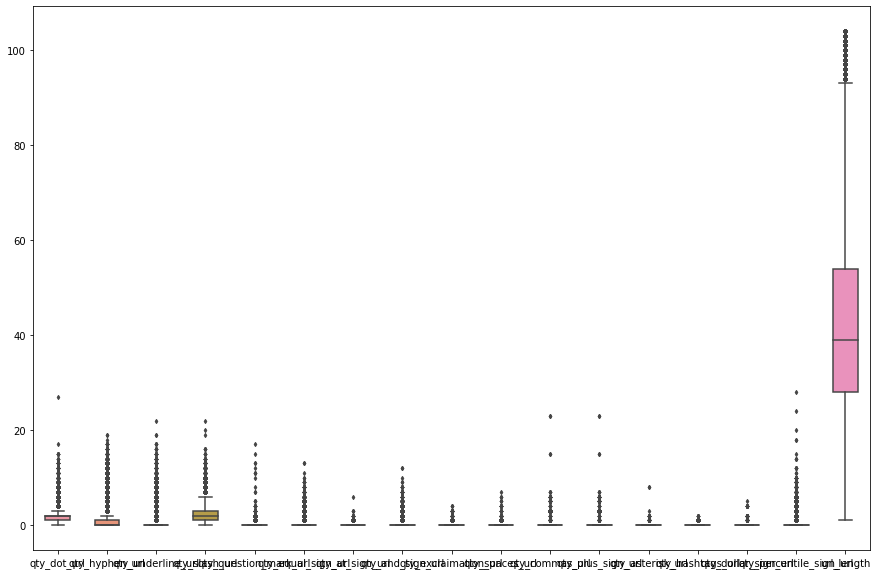

In [81]:
# plotting the cleaned dataframe to check for outliers

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

**Report**

* Outliers are mostly seems to be handled in the data set. There are still some values which are outside of the max value

* This is alright for now as it won't affect the model as much

In [82]:
#checking null values after outlier handling

df.isnull().sum()

URL                            0
Label                          0
domain_name                    1
path                       62004
qty_dot_url                    0
qty_hyphen_url                 0
qty_underline_url              0
qty_slash_url                  0
qty_question_mark_url          0
qty_equal_sign_url             0
qty_at_sign_url                0
qty_and_sign_url               0
qty_exclaimation_url           0
qty_spaces_url                 0
qty_commas_url                 0
qty_plus_sign_url              0
qty_asterisk_url               0
qty_hashtags_url               0
qty_dollar_sign_url            0
qty_percentile_sign_url        0
url_length                     0
dtype: int64

# Create functions for model training and evaluation

In [139]:
# Create a function to get the scores for each model
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc


In [140]:
# Create cost of the model as per data description

def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [141]:
# Create a function which can evaluate models and return a report 

def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

# Evaluate model on different experiments

In [142]:
# Creating a smaller sample of the data set since the dataset is huge and this will help optimizing the computing time and power

subset_size = 55000 # you can adjust this to the size you want
random_indices = np.random.choice(df.index, size=subset_size, replace=False)
df_subset = df.loc[random_indices]

In [143]:
# splitting X, y for all experiments

X = df_subset[[feature for feature in df.columns if df[feature].dtype != 'O']]
y = df_subset['Label']

In [144]:
'''# splitting X, y for all experiments

X = df[[feature for feature in df.columns if df[feature].dtype != 'O']]
y = df['Label']'''

"# splitting X, y for all experiments\n\nX = df[[feature for feature in df.columns if df[feature].dtype != 'O']]\ny = df['Label']"

In [145]:
# Encoding the target variable

y = y.replace({'good':1, 'bad':0})
y.unique()

array([1, 0])

# Experiment: 1 = KNN Imputer for Null values

**Why Robust scaler and not Standard scaler?**

* Scaling the data using Robust scaler
* Since most of the independent variables are not normally distributed we cannot use Standardscaler

**Why Robust Scaler and not Minmax?**

* Because most of the feature has outliers. So Minmax will scale data according to Max values which is outlier.
* This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

**Why KNN Imputer?**

* KNN Imputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.
* KNNImputer helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.
* Here we Iterates through different K values and get accuracy and choose best K values.

In [146]:
# fit with robust scaler for KNN best K-selection experiment

robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [147]:
# finding the optimal N neighbour for KNN imputer

results = []
imputer = KNNImputer(n_neighbors = 5, weights = 'uniform', metric = 'nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies: 
    pipeline = Pipeline(steps= [('i', KNNImputer(n_neighbors = int(s))), ('m',LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring = 'accuracy', cv = 2, n_jobs = -1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))


n_neighbors= 1 || accuracy (0.7513)
n_neighbors= 3 || accuracy (0.7513)
n_neighbors= 5 || accuracy (0.7513)
n_neighbors= 7 || accuracy (0.7513)
n_neighbors= 9 || accuracy (0.7513)


**All n_neighbor seem to give the same accuracy**

# Pipeline for KNN imputer

In [148]:
# Fit the KNN imputer with selected K value
knn_pipeline = Pipeline(steps = [
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('RobustScaler', RobustScaler())
])

In [149]:
X_knn = knn_pipeline.fit_transform(X)

# Handling Imbalanced data

**SMOTE+TOMEK** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.

* This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class

* To add new data of minority class

1. Choose random data from the minority class.
2. Calculate the distance between the random data and its k nearest neighbors.
3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
4. Repeat step number 2–3 until the desired proportion of minority class is met.

* To remove the tomek links of the majority class

1. Choose random data from the majority class.
2. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.

* This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [150]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=1,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

# Initialize Default Models in a dictionary

In [151]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

# Experiment 1: Fit KNN imputed data for models in dictionary

In [152]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.7984
- F1 score: 0.7865
- Precision: 0.8385
- Recall: 0.7405
- Roc Auc Score: 0.7985
- COST: 4216360.
----------------------------------
Model performance for Test set
- Accuracy: 0.7574
- F1 score: 0.7434
- Precision: 0.7790
- Recall: 0.7109
- Roc Auc Score: 0.7569
- COST: 1161480.


Decision Tree
Model performance for Training set
- Accuracy: 0.7984
- F1 score: 0.7844
- Precision: 0.8457
- Recall: 0.7314
- Roc Auc Score: 0.7986
- COST: 4360400.
----------------------------------
Model performance for Test set
- Accuracy: 0.7525
- F1 score: 0.7361
- Precision: 0.7784
- Recall: 0.6982
- Roc Auc Score: 0.7519
- COST: 1211750.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.6948
- F1 score: 0.6635
- Precision: 0.7418
- Recall: 0.6001
- Roc Auc Score: 0.6950
- COST: 6494150.
----------------------------------
Model performance for Test set
- Accuracy: 0.6897
- F1 score: 0.6556
- Precision: 0.7263
- Recall:

# Report for KNN Imputed data

In [153]:
report_knn

,Model Name,Cost
0,Random Forest,1161480
4,K-Neighbors Classifier,1181950
6,CatBoosting Classifier,1184060
1,Decision Tree,1211750
3,Logistic Regression,1477280
7,AdaBoost Classifier,1510360
2,Gradient Boosting,1612840
5,XGBClassifier,1652250


**Insights**

* For the Experiment 1: Knn imputer has Random Forest as the best Model
* Proceeding with further experiments

# Experiment 2: Simple imputer with strategy mean

* SimpleImputer is a class in the sklearn.impute module that can be used to replace missing values in a dataset, using a variety of input strategies.
* Here we use SimpleImputer to impute multiple columns at once by passing in a list of column names. 
* SimpleImputer will then replace missing values in all of the specified columns.

In [154]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the Simple imputer with strategy median
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
])

In [155]:
# Fit X with median_pipeline
X_median = median_pipeline.fit_transform(X)

In [156]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=1,sampling_strategy='minority')
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_median, y)

In [157]:
# Training the models
report_median = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.7984
- F1 score: 0.7869
- Precision: 0.8373
- Recall: 0.7422
- Roc Auc Score: 0.7986
- COST: 4189880.
----------------------------------
Model performance for Test set
- Accuracy: 0.7574
- F1 score: 0.7440
- Precision: 0.7778
- Recall: 0.7131
- Roc Auc Score: 0.7569
- COST: 1153140.


Decision Tree
Model performance for Training set
- Accuracy: 0.7984
- F1 score: 0.7844
- Precision: 0.8457
- Recall: 0.7314
- Roc Auc Score: 0.7986
- COST: 4360400.
----------------------------------
Model performance for Test set
- Accuracy: 0.7531
- F1 score: 0.7369
- Precision: 0.7788
- Recall: 0.6993
- Roc Auc Score: 0.7525
- COST: 1207240.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.6948
- F1 score: 0.6635
- Precision: 0.7418
- Recall: 0.6001
- Roc Auc Score: 0.6950
- COST: 6494150.
----------------------------------
Model performance for Test set
- Accuracy: 0.6897
- F1 score: 0.6556
- Precision: 0.7263
- Recall:

In [158]:
report_median

,Model Name,Cost
0,Random Forest,1153140
4,K-Neighbors Classifier,1181950
6,CatBoosting Classifier,1184060
1,Decision Tree,1207240
3,Logistic Regression,1477280
7,AdaBoost Classifier,1510360
2,Gradient Boosting,1612840
5,XGBClassifier,1652250


**Insights**

* For the Experiment 2: Simple imputer with median strategy has Random Forest as the best Model
* Proceeding with further experiments

# Experiment 3: MICE for Imputing Null values

* MICE stands for Multivariate Imputation By Chained Equations algorithm
* This technique by which we can effortlessly impute missing values in a dataset by looking at data from other columns and trying to estimate the best prediction for each missing value.
* `ImputationKernel` Creates a kernel dataset. This dataset can perform MICE on itself, and impute new data from models obtained during MICE.

In [159]:
import miceforest as mf

X_mice = X.copy()
kernel = mf.ImputationKernel(
    X_mice,
    save_all_iterations = True,
    random_state = 1
)


In [160]:
X_mice = kernel.complete_data()

In [161]:
# fit robust scaler

mice_pipeline = Pipeline(steps=[('RobustScaler', RobustScaler())])

In [162]:
# fit X with Mice imputer

X_mice = mice_pipeline.fit_transform(X_mice)

In [163]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=1,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mice, y)

In [164]:
# Training the models

report_mice = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.7984
- F1 score: 0.7870
- Precision: 0.8369
- Recall: 0.7426
- Roc Auc Score: 0.7986
- COST: 4183510.
----------------------------------
Model performance for Test set
- Accuracy: 0.7578
- F1 score: 0.7448
- Precision: 0.7774
- Recall: 0.7148
- Roc Auc Score: 0.7573
- COST: 1146220.


Decision Tree
Model performance for Training set
- Accuracy: 0.7984
- F1 score: 0.7844
- Precision: 0.8457
- Recall: 0.7314
- Roc Auc Score: 0.7986
- COST: 4360400.
----------------------------------
Model performance for Test set
- Accuracy: 0.7529
- F1 score: 0.7367
- Precision: 0.7784
- Recall: 0.6992
- Roc Auc Score: 0.7523
- COST: 1207770.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.6948
- F1 score: 0.6635
- Precision: 0.7418
- Recall: 0.6001
- Roc Auc Score: 0.6950
- COST: 6494150.
----------------------------------
Model performance for Test set
- Accuracy: 0.6897
- F1 score: 0.6556
- Precision: 0.7263
- Recall:

In [165]:
report_mice

,Model Name,Cost
0,Random Forest,1146220
4,K-Neighbors Classifier,1181950
6,CatBoosting Classifier,1184060
1,Decision Tree,1207770
3,Logistic Regression,1477280
7,AdaBoost Classifier,1510360
2,Gradient Boosting,1612840
5,XGBClassifier,1652250


**Insights**

* For the Experiment 3: Mice imputer has Random Forest as the best Model
* Proceeding with further experiments

# Experiment 4: Simple Imputer with Strategy Constant

* Another strategy which can be used is replacing missing values with a fixed (constant) value.
* To do this, specify “constant” for strategy and specify the fill value using the fill_value parameter

In [166]:
# Create a pipeline with simple imputer with strategy constant and fill value 0
constant_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [167]:
X_const =constant_pipeline.fit_transform(X)

In [168]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=1,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)

In [169]:
# training the models
report_const = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.7984
- F1 score: 0.7865
- Precision: 0.8385
- Recall: 0.7405
- Roc Auc Score: 0.7986
- COST: 4216350.
----------------------------------
Model performance for Test set
- Accuracy: 0.7572
- F1 score: 0.7439
- Precision: 0.7773
- Recall: 0.7133
- Roc Auc Score: 0.7567
- COST: 1152200.


Decision Tree
Model performance for Training set
- Accuracy: 0.7984
- F1 score: 0.7844
- Precision: 0.8457
- Recall: 0.7314
- Roc Auc Score: 0.7986
- COST: 4360400.
----------------------------------
Model performance for Test set
- Accuracy: 0.7533
- F1 score: 0.7371
- Precision: 0.7788
- Recall: 0.6997
- Roc Auc Score: 0.7527
- COST: 1205750.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.6948
- F1 score: 0.6635
- Precision: 0.7418
- Recall: 0.6001
- Roc Auc Score: 0.6950
- COST: 6494150.
----------------------------------
Model performance for Test set
- Accuracy: 0.6897
- F1 score: 0.6556
- Precision: 0.7263
- Recall:

In [170]:
report_const

,Model Name,Cost
0,Random Forest,1152200
4,K-Neighbors Classifier,1181950
6,CatBoosting Classifier,1184060
1,Decision Tree,1205750
3,Logistic Regression,1477280
7,AdaBoost Classifier,1510360
2,Gradient Boosting,1612840
5,XGBClassifier,1652250


**Insights**

* For the Experiment 4: Simple imputer with constant strategy has Random Forest as the best Model
* Proceeding with further experiments

# Experiment 5: Simple Imputer with Strategy Mean

* Another strategy which can be used is replacing missing values with mean
* Here we replace the missing values with the mean of the column

In [171]:
# Create a pipeline with Simple imputer with strategy mean
mean_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='mean')),
    ('RobustScaler', RobustScaler())
])

In [172]:
X_mean = mean_pipeline.fit_transform(X)

In [173]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=1,sampling_strategy='minority' , n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mean, y)

In [174]:
# Training all models
report_mean = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.7984
- F1 score: 0.7864
- Precision: 0.8389
- Recall: 0.7401
- Roc Auc Score: 0.7986
- COST: 4223200.
----------------------------------
Model performance for Test set
- Accuracy: 0.7586
- F1 score: 0.7447
- Precision: 0.7802
- Recall: 0.7123
- Roc Auc Score: 0.7581
- COST: 1155900.


Decision Tree
Model performance for Training set
- Accuracy: 0.7984
- F1 score: 0.7844
- Precision: 0.8457
- Recall: 0.7314
- Roc Auc Score: 0.7986
- COST: 4360400.
----------------------------------
Model performance for Test set
- Accuracy: 0.7529
- F1 score: 0.7366
- Precision: 0.7789
- Recall: 0.6987
- Roc Auc Score: 0.7523
- COST: 1209720.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.6948
- F1 score: 0.6635
- Precision: 0.7418
- Recall: 0.6001
- Roc Auc Score: 0.6950
- COST: 6494150.
----------------------------------
Model performance for Test set
- Accuracy: 0.6897
- F1 score: 0.6556
- Precision: 0.7263
- Recall:

In [175]:
report_mean

,Model Name,Cost
0,Random Forest,1155900
4,K-Neighbors Classifier,1181950
6,CatBoosting Classifier,1184060
1,Decision Tree,1209720
3,Logistic Regression,1477280
7,AdaBoost Classifier,1510360
2,Gradient Boosting,1612840
5,XGBClassifier,1652250


**Insights**

* Experiment: 5 with Simple imputer strategy mean has Random Forest as the best model
* Proceeding with further experiments

# Experiment 6: Principle component analysis with imputing median

* Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables!
* As the dataset has 21 columns we can try PCA and check our metrics Cost

In [176]:
from sklearn.decomposition import PCA

In [177]:
pca_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [178]:
X_pca = pca_pipeline.fit_transform(X)

In [179]:
#Applying PCA

var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    df_pca=pc.fit(X_pca)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

**Variance Plot**

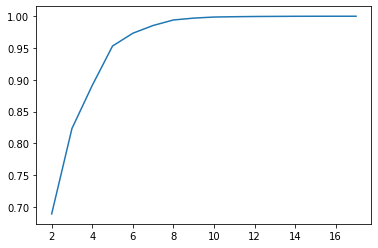

In [180]:
# plotting variance ratio
pd.Series(var_ratio).plot()

* Kneed algorithm to find the elbow point
* Given a set of x and y values, kneed will return the knee point of the function. The knee point is the point of maximum curvature.



<Figure size 360x360 with 0 Axes>

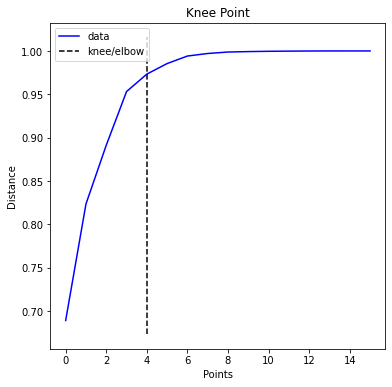

Knee Locator k = 6


In [181]:
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio= list(var_ratio.values())
components=  list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= components[knee.knee]
print('Knee Locator k =', k)

In [182]:
# Reducing the dimension of the data

pca_final =PCA(n_components = 7, random_state=1).fit(X_res)

reduced = pca_final.fit_transform(X_pca)

In [183]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=1,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(reduced, y)

In [184]:
# Training all models
report_pca = evaluate_models(X_res,y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.7992
- F1 score: 0.7882
- Precision: 0.8323
- Recall: 0.7486
- Roc Auc Score: 0.7991
- COST: 4074310.
----------------------------------
Model performance for Test set
- Accuracy: 0.7473
- F1 score: 0.7372
- Precision: 0.7732
- Recall: 0.7044
- Roc Auc Score: 0.7475
- COST: 1209680.


Decision Tree
Model performance for Training set
- Accuracy: 0.7992
- F1 score: 0.7866
- Precision: 0.8379
- Recall: 0.7411
- Roc Auc Score: 0.7991
- COST: 4191400.
----------------------------------
Model performance for Test set
- Accuracy: 0.7405
- F1 score: 0.7280
- Precision: 0.7703
- Recall: 0.6901
- Roc Auc Score: 0.7408
- COST: 1267610.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.7142
- F1 score: 0.6809
- Precision: 0.7693
- Recall: 0.6107
- Roc Auc Score: 0.7141
- COST: 6292160.
----------------------------------
Model performance for Test set
- Accuracy: 0.7092
- F1 score: 0.6765
- Precision: 0.7687
- Recall:

In [185]:
report_pca

,Model Name,Cost
0,Random Forest,1209680
1,Decision Tree,1267610
4,K-Neighbors Classifier,1275330
6,CatBoosting Classifier,1366690
7,AdaBoost Classifier,1552550
3,Logistic Regression,1553950
2,Gradient Boosting,1613170
5,XGBClassifier,1641960


**Insights**

* Experiment: 6 = Principle component analysis with imputing median gas K-Neighbor as the best model

In [187]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Imputation_method","Total_cost"]
pt.add_row(["K Neighbor Classifer","KNN imputer","1161480"])
pt.add_row(["K Neighbor Classifer","Simple Imputer-Mean","1153140"])
pt.add_row(["K Neighbor Classifer","Mice Imputer","1146220"])
pt.add_row(["Random Forest","Simple Imputer-Constant","1152200"])
pt.add_row(["Random Forest","PCA-Mean","1209680"])
print(pt)

+----------------------+-------------------------+------------+
|        Model         |    Imputation_method    | Total_cost |
+----------------------+-------------------------+------------+
| K Neighbor Classifer |       KNN imputer       |  1161480   |
| K Neighbor Classifer |   Simple Imputer-Mean   |  1153140   |
| K Neighbor Classifer |       Mice Imputer      |  1146220   |
|    Random Forest     | Simple Imputer-Constant |  1152200   |
|    Random Forest     |         PCA-Mean        |  1209680   |
+----------------------+-------------------------+------------+


**Report**

* From the final report we can see than Random Forest with Mice imputer for null values has performed the best with cost of 1146220

# Fitting the Final Model and get reports

In [188]:
final_model = RandomForestClassifier()

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=1,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mice, y)

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=1)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [190]:
print("Final Random Forest Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final Random Forest Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final Random Forest Accuracy Score (Train) : 0.8001091788193091
Final Random Forest Accuracy Score (Test) : 0.7513257221286418


In [191]:
print("Final Random Forest Cost Metric(Test) :",total_cost(y_test, y_pred))


Final Random Forest Cost Metric(Test) : 1260940


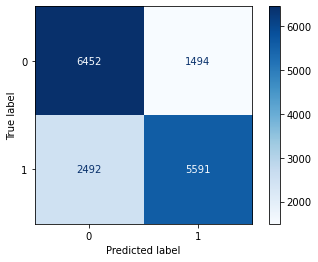

In [192]:
from sklearn.metrics import plot_confusion_matrix

#plots Confusion matrix
plot_confusion_matrix(final_model, X_test, y_test, cmap='Blues', values_format='d')

# The best Model is Random Forest with 75.1% accuracy and cost of 1260940